## The Data



https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [147]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [148]:
df=pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [149]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [150]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [152]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [153]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_11304\2798333729.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

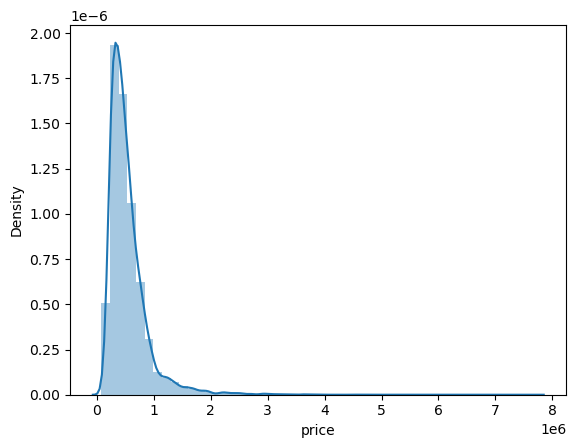

In [154]:

sns.distplot(df['price'])

(array([9.000e+01, 3.710e+02, 1.214e+03, 2.047e+03, 2.178e+03, 2.135e+03,
        2.023e+03, 1.853e+03, 1.599e+03, 1.446e+03, 1.106e+03, 9.460e+02,
        7.830e+02, 6.830e+02, 5.790e+02, 4.190e+02, 3.330e+02, 2.590e+02,
        1.640e+02, 1.410e+02, 1.070e+02, 1.030e+02, 1.150e+02, 9.400e+01,
        9.300e+01, 7.000e+01, 6.000e+01, 7.000e+01, 3.300e+01, 5.700e+01,
        3.600e+01, 4.500e+01, 2.700e+01, 2.800e+01, 1.900e+01, 3.100e+01,
        1.900e+01, 2.300e+01, 6.000e+00, 5.000e+00, 1.100e+01, 1.400e+01,
        1.600e+01, 1.100e+01, 7.000e+00, 1.400e+01, 7.000e+00, 1.100e+01,
        8.000e+00, 6.000e+00, 3.000e+00, 7.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 9.000e+00, 5.000e+00, 7.000e+00, 2.000e+00, 5.000e+00,
        1.000e+00, 5.000e+00, 0.000e+00, 5.000e+00, 1.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

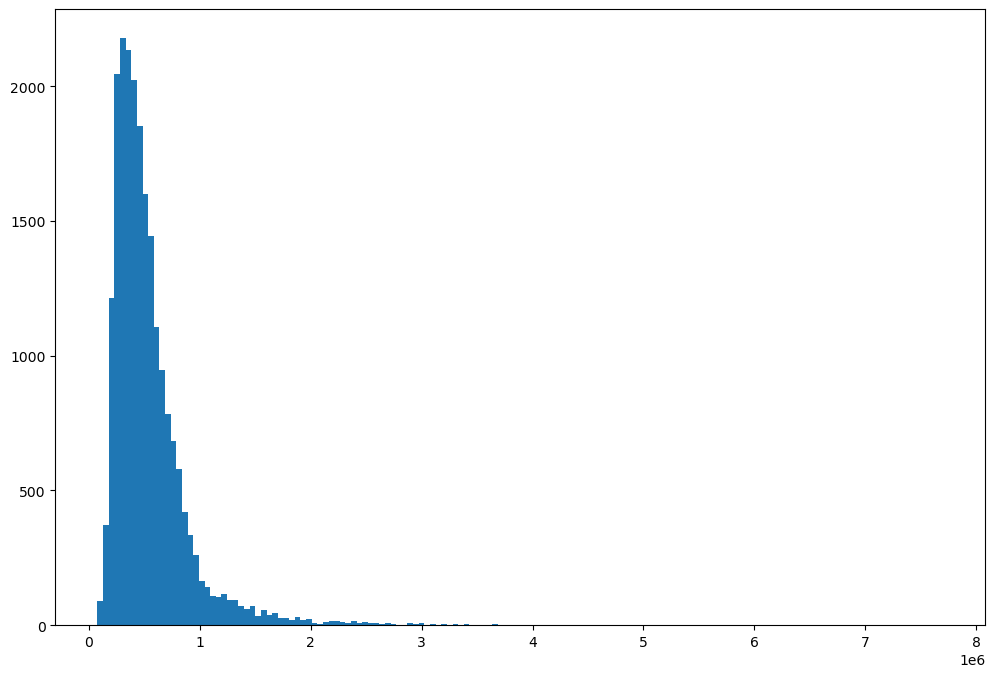

In [155]:
plt.figure(figsize=(12,8))
plt.hist(df['price'], bins=150)

<Axes: xlabel='price', ylabel='sqft_living'>

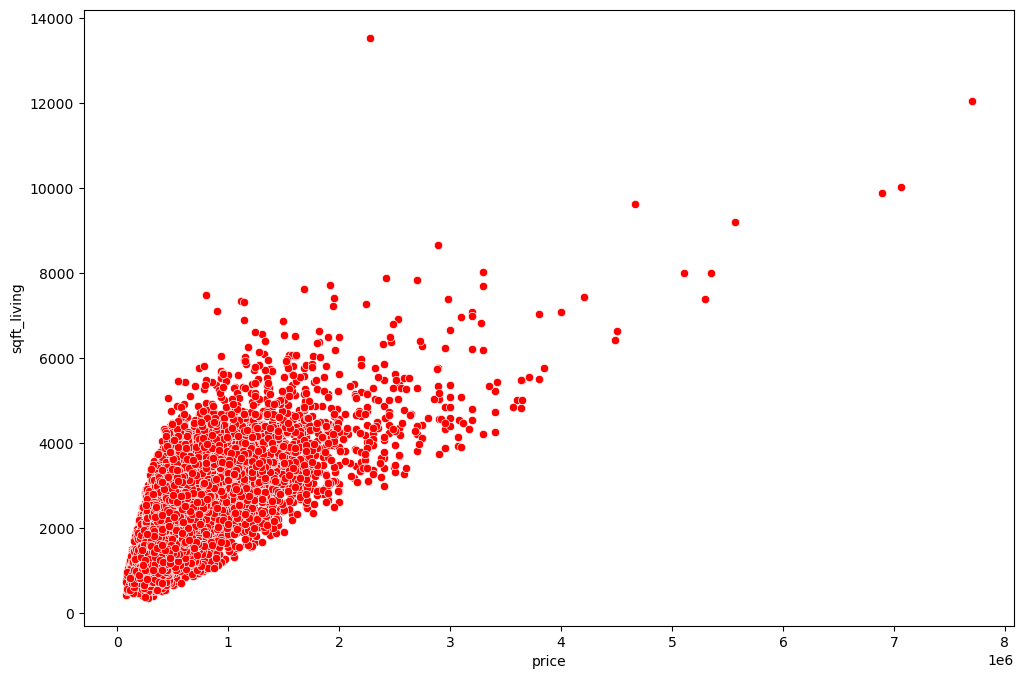

In [156]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='sqft_living', data=df, color='red')

<Axes: xlabel='price', ylabel='bedrooms'>

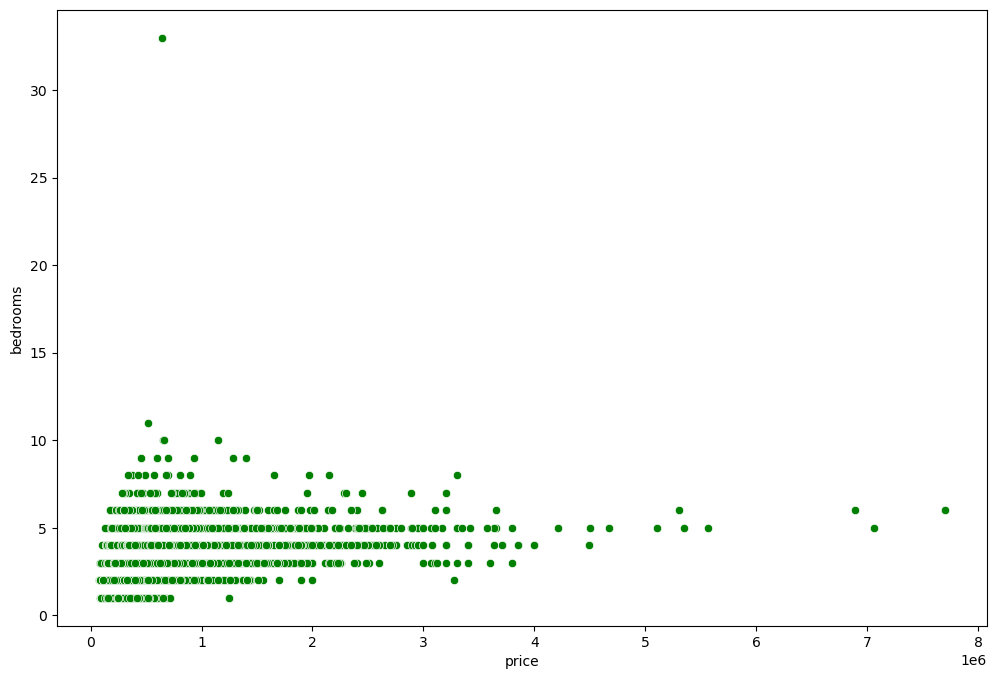

In [157]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='bedrooms', data=df, color='g')

<Axes: xlabel='sqft_living', ylabel='bedrooms'>

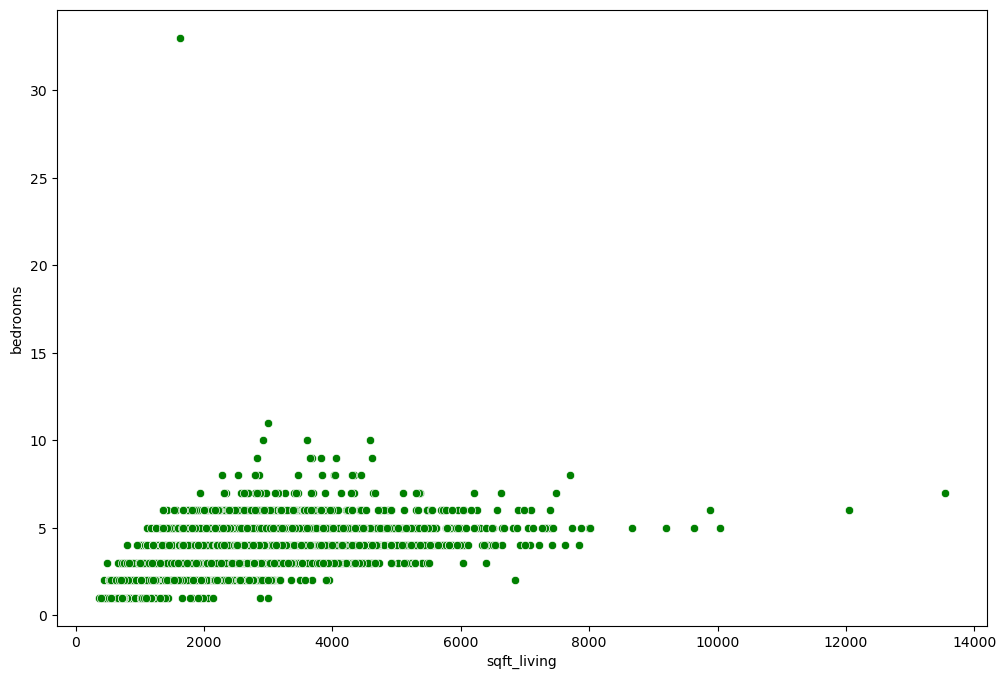

In [158]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='sqft_living', y='bedrooms', data=df, color='g')

<Axes: xlabel='bathrooms', ylabel='bedrooms'>

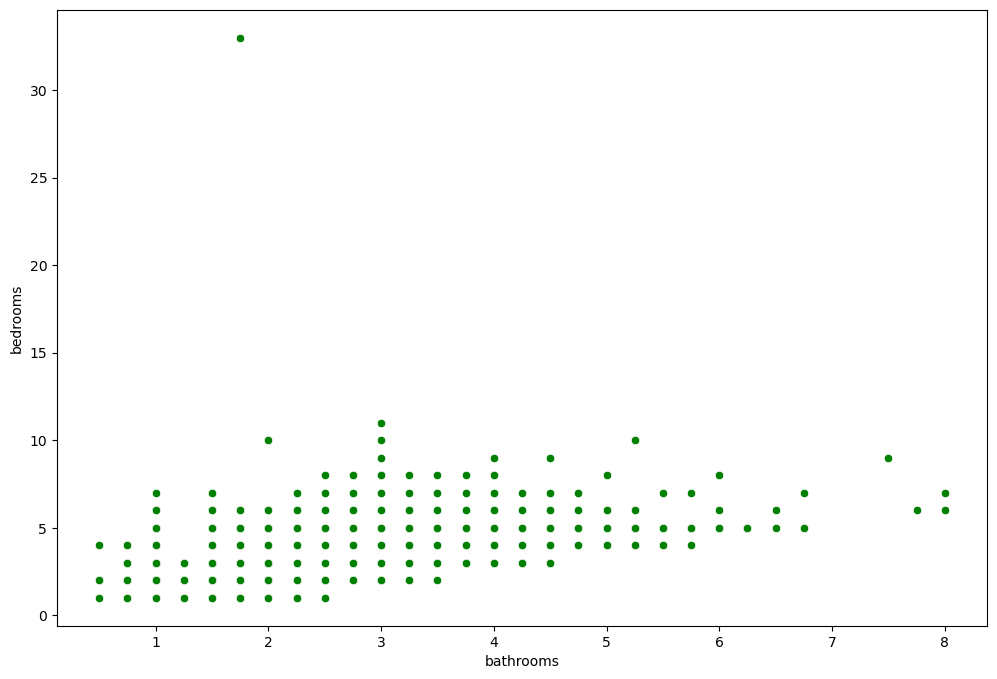

In [159]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='bathrooms', y='bedrooms', data=df, color='g')

<Axes: xlabel='bedrooms', ylabel='price'>

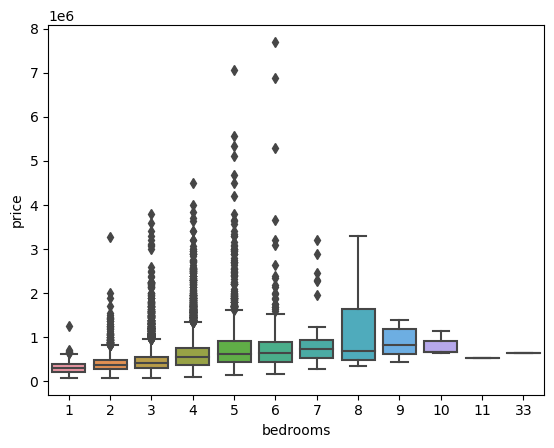

In [160]:
sns.boxplot(x='bedrooms', y='price', data=df)

<Axes: xlabel='bathrooms', ylabel='price'>

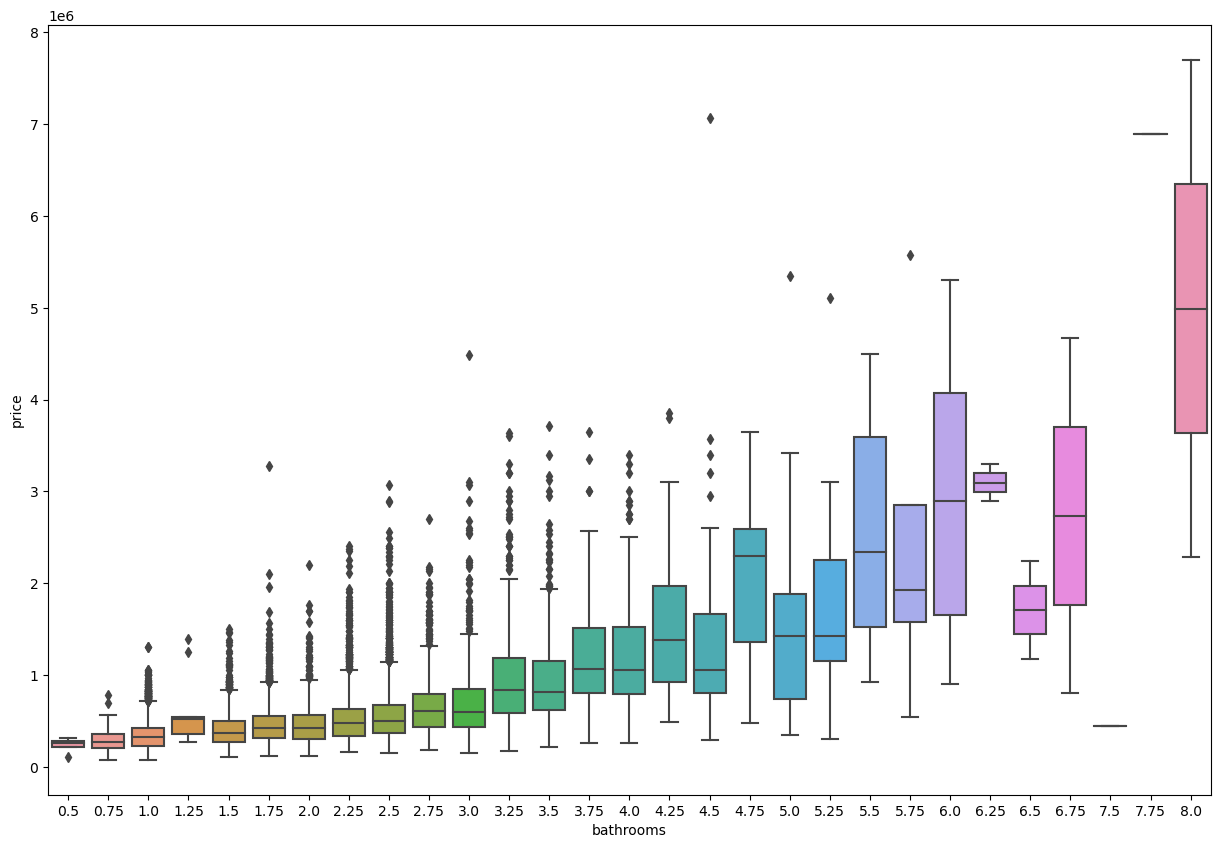

In [161]:
plt.figure(figsize=(15,10))
sns.boxplot(x='bathrooms', y='price', data=df)

<Axes: xlabel='floors', ylabel='price'>

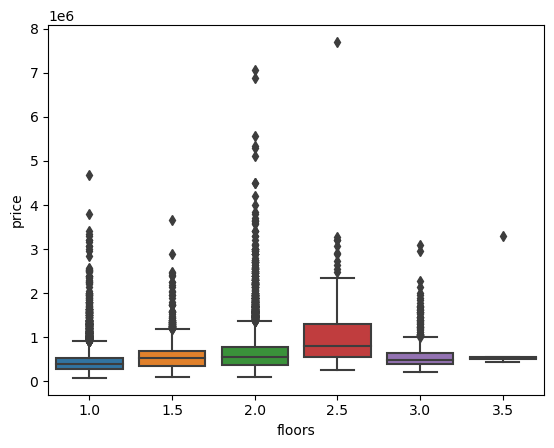

In [162]:
sns.boxplot(x='floors', y='price', data=df)

# Geographical properties

<Axes: xlabel='price', ylabel='long'>

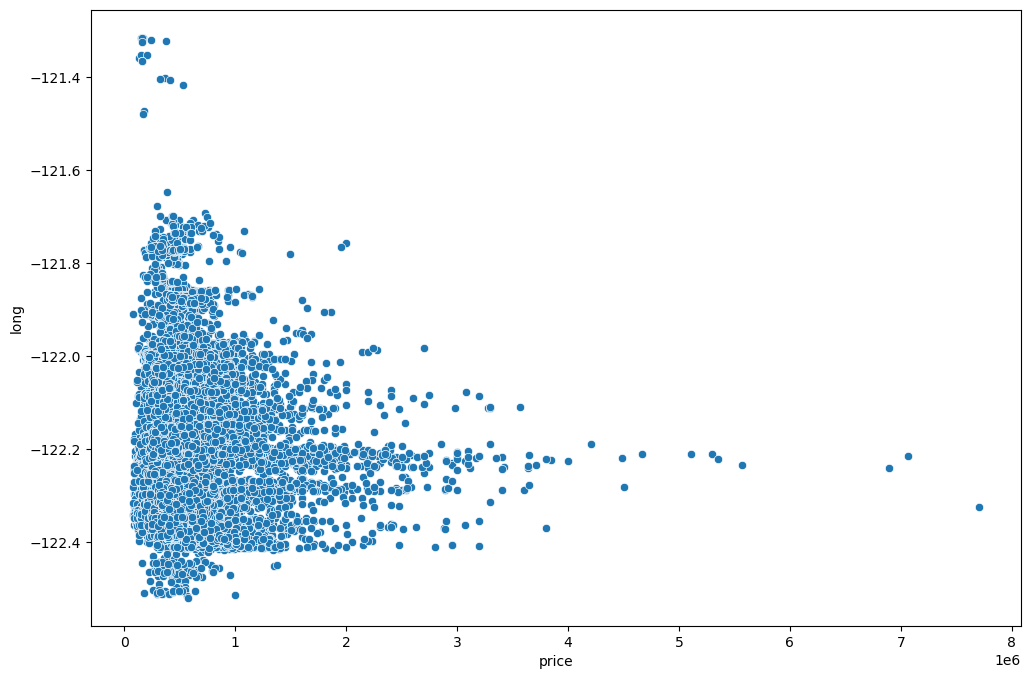

In [163]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long',data=df)

<Axes: xlabel='price', ylabel='lat'>

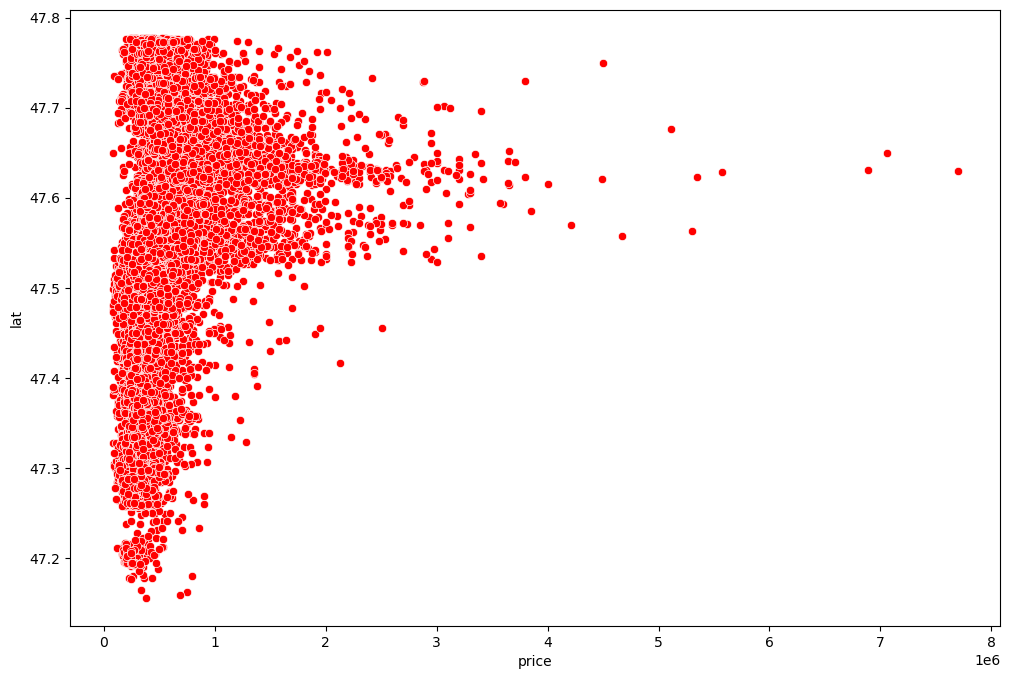

In [164]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='lat',data=df, color='r')

<Axes: xlabel='lat', ylabel='long'>

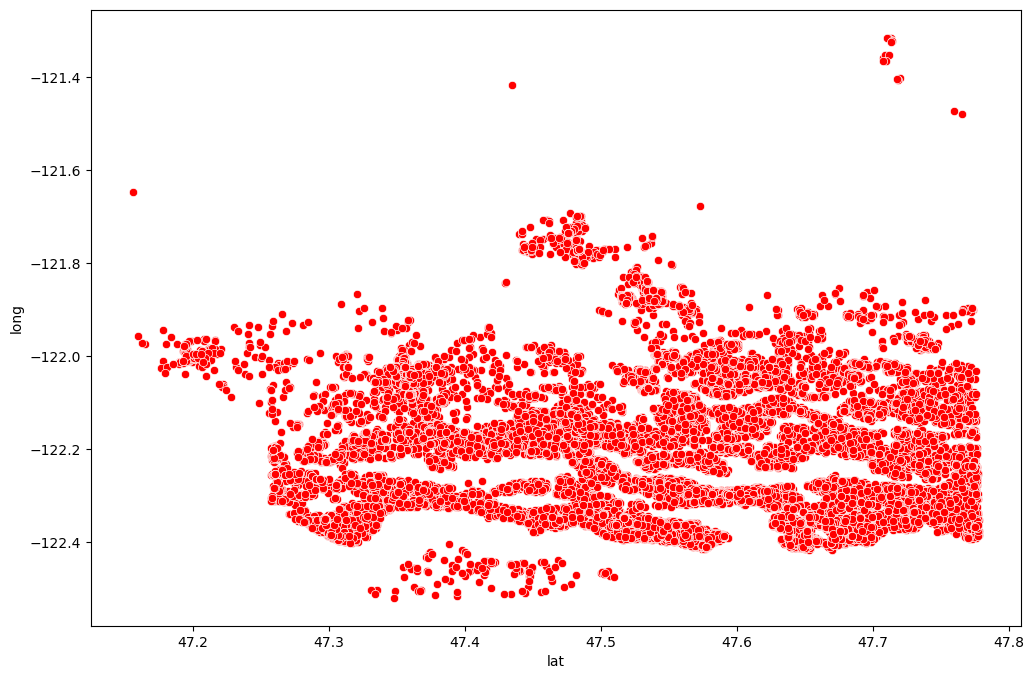

In [165]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='lat', y='long',data=df, color='r')

<Axes: xlabel='long', ylabel='lat'>

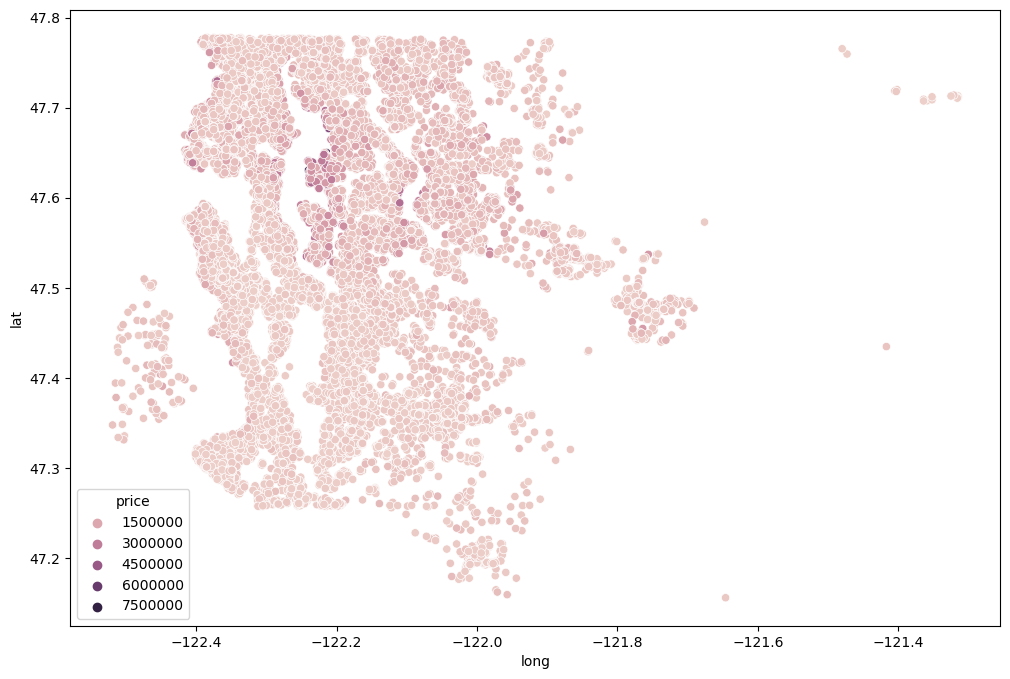

In [166]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,color='r',hue='price')

In [167]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [168]:
len(df)*0.01

215.97

In [169]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

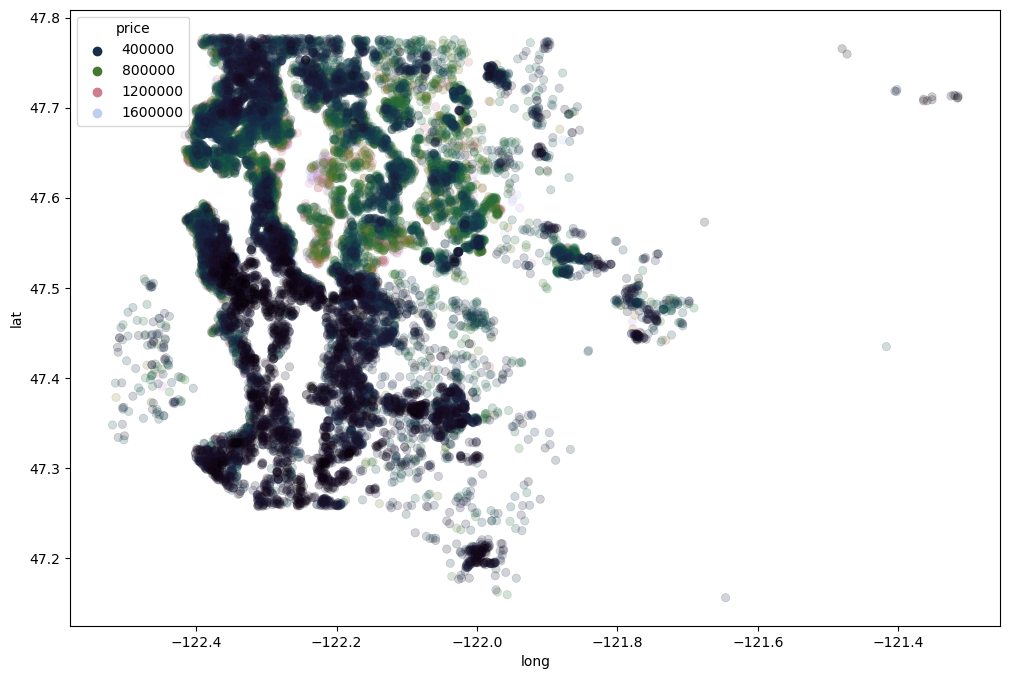

In [170]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='cubehelix',edgecolor=None,alpha=0.2)

<Axes: xlabel='long', ylabel='lat'>

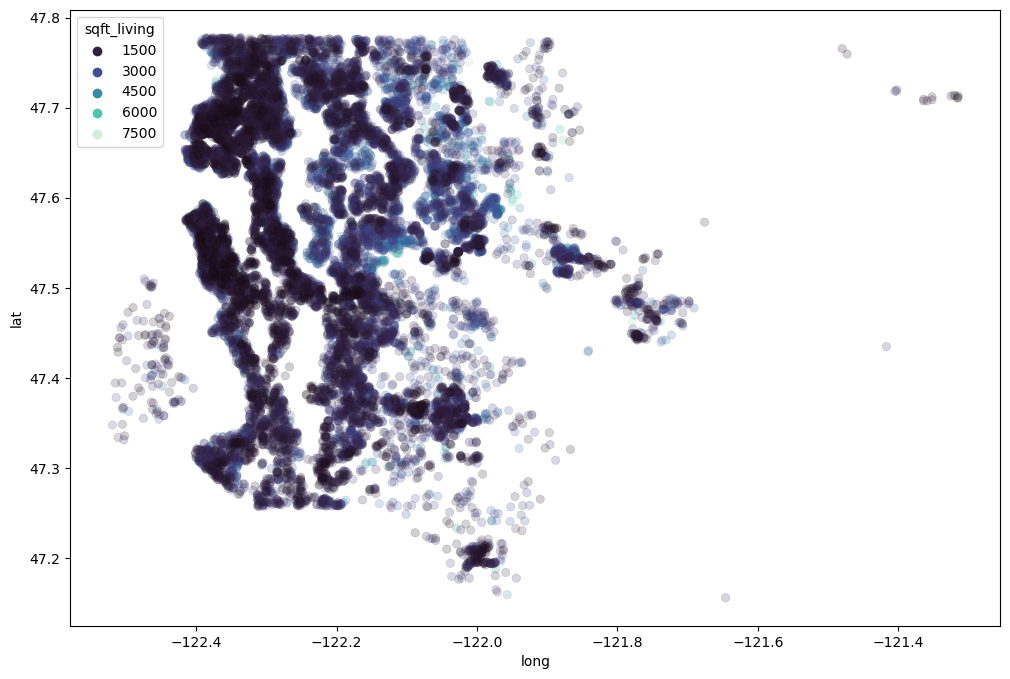

In [171]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='sqft_living',
                palette='mako',edgecolor=None,alpha=0.2)

<Axes: xlabel='long', ylabel='lat'>

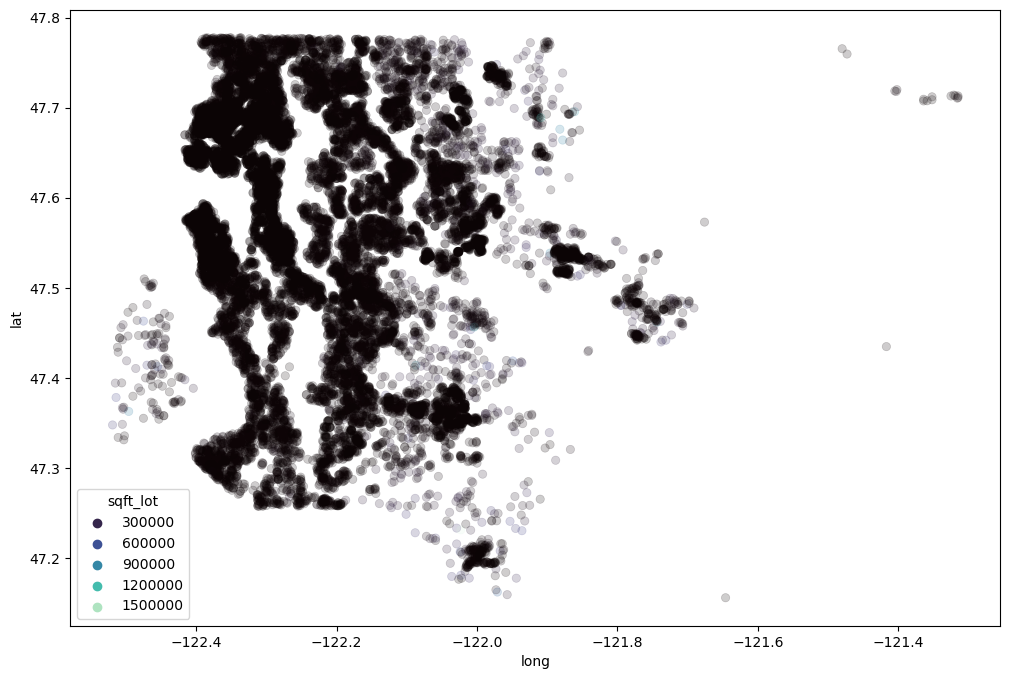

In [172]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='sqft_lot',
                palette='mako',edgecolor=None,alpha=0.2)

<Axes: xlabel='long', ylabel='lat'>

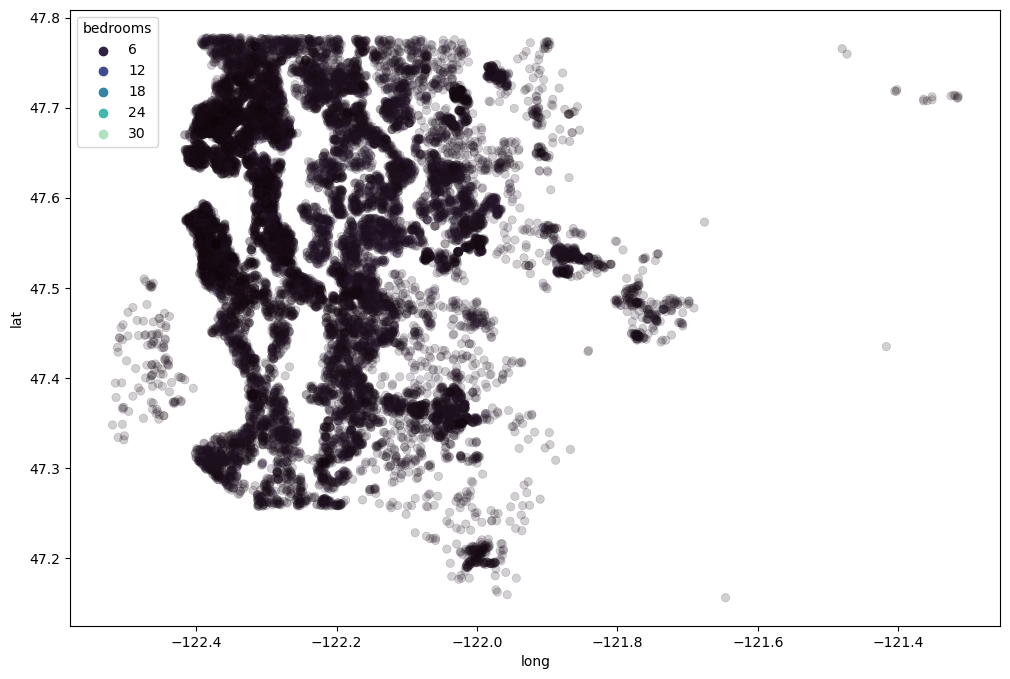

In [173]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='bedrooms',
                palette='mako',edgecolor=None,alpha=0.2)

<Axes: xlabel='waterfront', ylabel='price'>

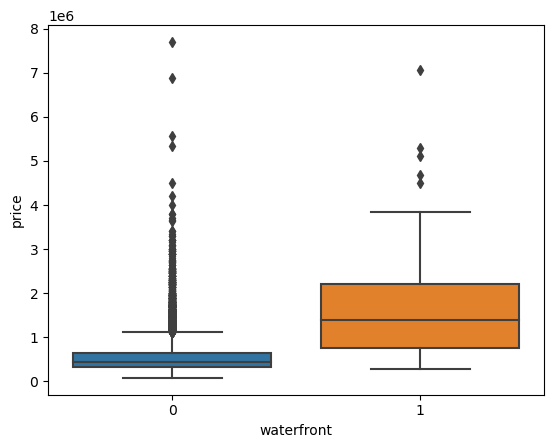

In [174]:
sns.boxplot(x='waterfront',y='price',data=df)

<Axes: xlabel='view', ylabel='price'>

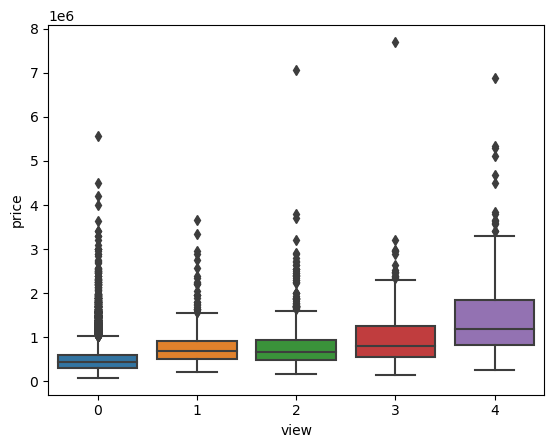

In [175]:
sns.boxplot(x='view',y='price',data=df)

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<Axes: xlabel='grade', ylabel='price'>

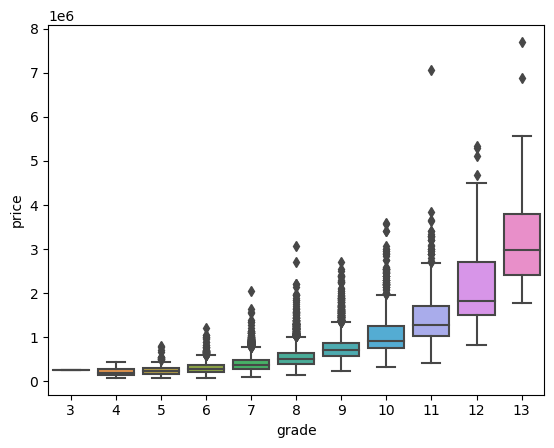

In [31]:
sns.boxplot(x='grade',y='price',data=df)

<Axes: xlabel='floors', ylabel='price'>

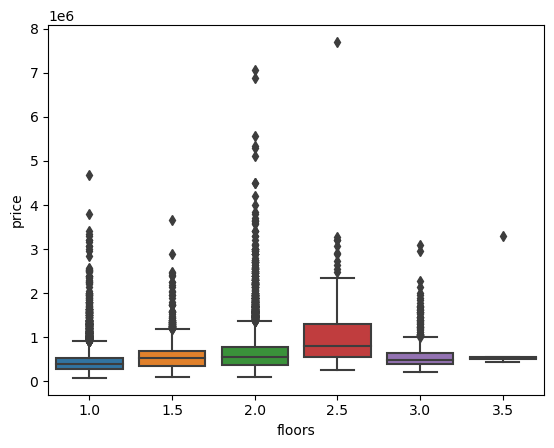

In [32]:
sns.boxplot(x='floors',y='price',data=df)

In [33]:
df=df.drop('id',axis=1)

In [34]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Feature Engineering from the data

<Axes: xlabel='year', ylabel='price'>

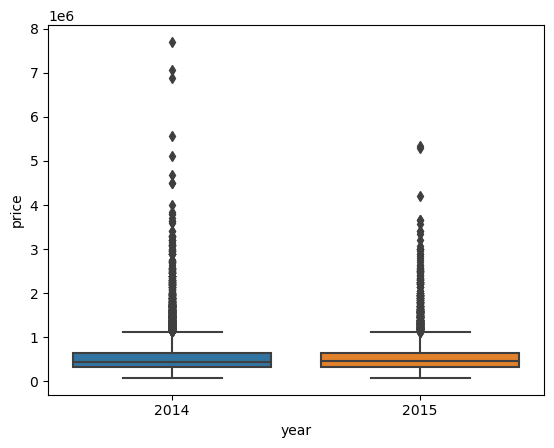

In [37]:
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].apply(lambda date:date.month)
df['year']=df['date'].apply(lambda date:date.year)
sns.boxplot(x='year',y='price', data=df)

<Axes: xlabel='month', ylabel='price'>

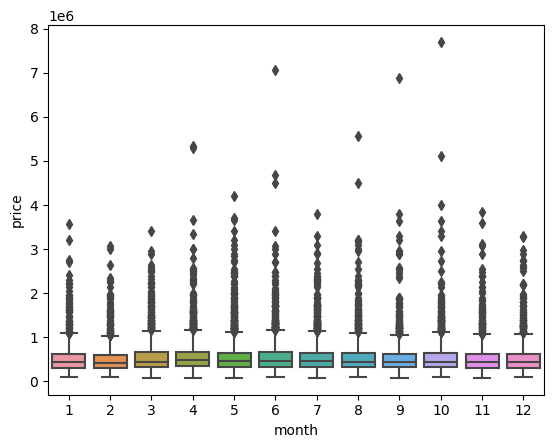

In [38]:
sns.boxplot(x='month', y='price', data=df)

<Axes: xlabel='month'>

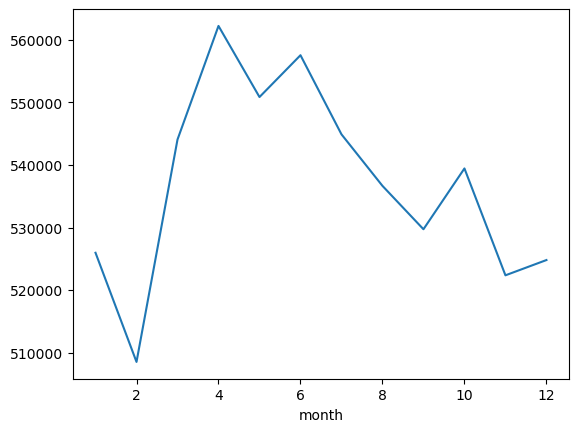

In [39]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

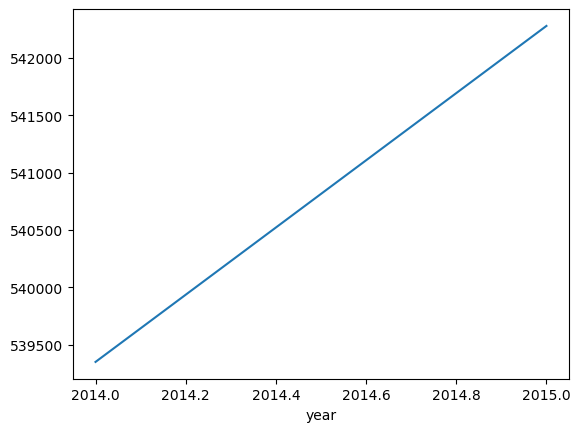

In [40]:
df.groupby('year').mean()['price'].plot()

In [188]:
df=df.drop('date',axis=1)

In [189]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


KeyError: 'zipcode'

In [ ]:
df.groupby('zipcode').mean()['price'].plot()

In [ ]:
df=df.drop('zipcode', axis=1)

In [191]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [192]:
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [193]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

<Axes: xlabel='sqft_basement'>

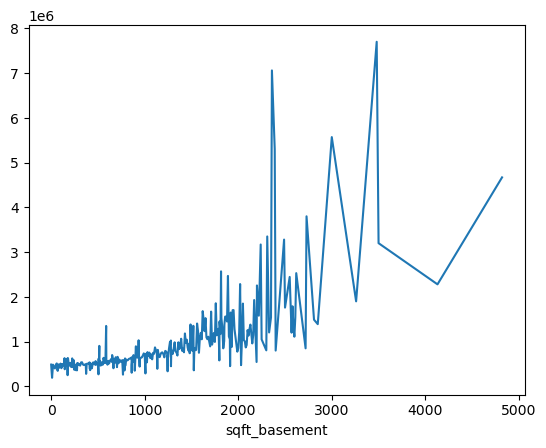

In [194]:
df.groupby('sqft_basement').mean()['price'].plot()

<Axes: xlabel='yr_renovated'>

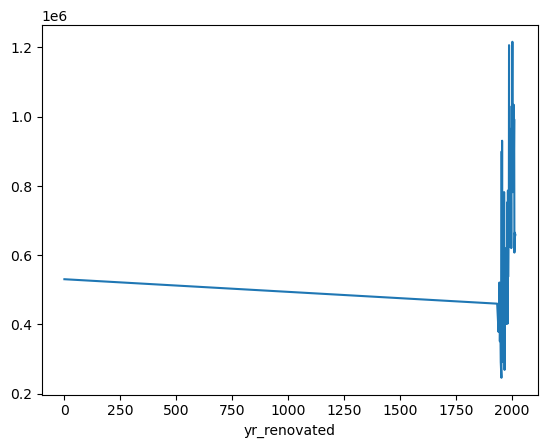

In [195]:
df.groupby('yr_renovated').mean()['price'].plot()

In [196]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


# Scaling and Train Test Split

In [197]:
X=df.drop('price', axis=1)
y=df[['price']]

In [198]:
X.shape

(21597, 18)

In [199]:
y.shape

(21597, 1)

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

# Scaling

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [203]:
X_train.shape

(15117, 18)

In [205]:
X_test.shape

(6480, 18)

In [206]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [207]:
model = Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [208]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          batch_size=128, epochs=600)

Epoch 1/600

119/119 [==============================] - 2s 4ms/step - loss: 434692980736.0000 - val_loss: 408532254720.0000
Epoch 2/600
119/119 [==============================] - 0s 3ms/step - loss: 433914740736.0000 - val_loss: 405967798272.0000
Epoch 3/600
119/119 [==============================] - 0s 3ms/step - loss: 423764328448.0000 - val_loss: 382697078784.0000
Epoch 4/600
119/119 [==============================] - 0s 3ms/step - loss: 370267357184.0000 - val_loss: 290792701952.0000
Epoch 5/600
119/119 [==============================] - 0s 3ms/step - loss: 236711526400.0000 - val_loss: 138779344896.0000
Epoch 6/600
119/119 [==============================] - 0s 3ms/step - loss: 120786010112.0000 - val_loss: 87342628864.0000
Epoch 7/600
119/119 [==============================] - 0s 3ms/step - loss: 100336697344.0000 - val_loss: 85213274112.0000
Epoch 8/600
119/119 [==============================] - 0s 3ms/step - loss: 98437865472.0000 - val_loss: 83585802240.0000
Epoch 9/600
119/119

119/119 [==============================] - 0s 3ms/step - loss: 40352321536.0000 - val_loss: 34213642240.0000
Epoch 67/600
119/119 [==============================] - 0s 3ms/step - loss: 40244957184.0000 - val_loss: 33928089600.0000
Epoch 68/600
119/119 [==============================] - 0s 3ms/step - loss: 40057561088.0000 - val_loss: 33814796288.0000
Epoch 69/600
119/119 [==============================] - 0s 3ms/step - loss: 40003833856.0000 - val_loss: 33704435712.0000
Epoch 70/600
119/119 [==============================] - 0s 3ms/step - loss: 39777861632.0000 - val_loss: 33680906240.0000
Epoch 71/600
119/119 [==============================] - 0s 3ms/step - loss: 39684968448.0000 - val_loss: 33492258816.0000
Epoch 72/600
119/119 [==============================] - 0s 3ms/step - loss: 39456886784.0000 - val_loss: 33523441664.0000
Epoch 73/600
119/119 [==============================] - 0s 3ms/step - loss: 39352127488.0000 - val_loss: 33319208960.0000
Epoch 74/600
119/119 [===============

Epoch 133/600
119/119 [==============================] - 0s 3ms/step - loss: 34024538112.0000 - val_loss: 29311191040.0000
Epoch 134/600
119/119 [==============================] - 0s 3ms/step - loss: 33989955584.0000 - val_loss: 29247531008.0000
Epoch 135/600
119/119 [==============================] - 0s 3ms/step - loss: 34007844864.0000 - val_loss: 29234120704.0000
Epoch 136/600
119/119 [==============================] - 0s 3ms/step - loss: 33959542784.0000 - val_loss: 29195595776.0000
Epoch 137/600
119/119 [==============================] - 0s 3ms/step - loss: 33901088768.0000 - val_loss: 29208107008.0000
Epoch 138/600
119/119 [==============================] - 0s 3ms/step - loss: 33860292608.0000 - val_loss: 29133506560.0000
Epoch 139/600
119/119 [==============================] - 0s 3ms/step - loss: 33827158016.0000 - val_loss: 29132025856.0000
Epoch 140/600
119/119 [==============================] - 0s 3ms/step - loss: 33823729664.0000 - val_loss: 29096218624.0000
Epoch 141/600
11

119/119 [==============================] - 0s 3ms/step - loss: 32374904832.0000 - val_loss: 28107069440.0000
Epoch 200/600
119/119 [==============================] - 0s 3ms/step - loss: 32353982464.0000 - val_loss: 28061073408.0000
Epoch 201/600
119/119 [==============================] - 0s 3ms/step - loss: 32342110208.0000 - val_loss: 28239298560.0000
Epoch 202/600
119/119 [==============================] - 0s 3ms/step - loss: 32314681344.0000 - val_loss: 28207501312.0000
Epoch 203/600
119/119 [==============================] - 0s 3ms/step - loss: 32294455296.0000 - val_loss: 28033622016.0000
Epoch 204/600
119/119 [==============================] - 0s 3ms/step - loss: 32290840576.0000 - val_loss: 28006330368.0000
Epoch 205/600
119/119 [==============================] - 0s 3ms/step - loss: 32255057920.0000 - val_loss: 28109086720.0000
Epoch 206/600
119/119 [==============================] - 0s 3ms/step - loss: 32259215360.0000 - val_loss: 28135344128.0000
Epoch 207/600
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 31326777344.0000 - val_loss: 27468494848.0000
Epoch 266/600
119/119 [==============================] - 0s 3ms/step - loss: 31324708864.0000 - val_loss: 27386255360.0000
Epoch 267/600
119/119 [==============================] - 0s 3ms/step - loss: 31275337728.0000 - val_loss: 27475113984.0000
Epoch 268/600
119/119 [==============================] - 0s 3ms/step - loss: 31319896064.0000 - val_loss: 27391879168.0000
Epoch 269/600
119/119 [==============================] - 0s 3ms/step - loss: 31254050816.0000 - val_loss: 27401691136.0000
Epoch 270/600
119/119 [==============================] - 0s 3ms/step - loss: 31253864448.0000 - val_loss: 27373733888.0000
Epoch 271/600
119/119 [==============================] - 0s 3ms/step - loss: 31242854400.0000 - val_loss: 27551930368.0000
Epoch 272/600
119/119 [==============================] - 0s 4ms/step - loss: 31314302976.0000 - val_loss: 27400263680.0000
Epoch 273/600
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 30549129216.0000 - val_loss: 26986219520.0000
Epoch 332/600
119/119 [==============================] - 0s 3ms/step - loss: 30541260800.0000 - val_loss: 26978783232.0000
Epoch 333/600
119/119 [==============================] - 0s 3ms/step - loss: 30549258240.0000 - val_loss: 26938730496.0000
Epoch 334/600
119/119 [==============================] - 0s 3ms/step - loss: 30532976640.0000 - val_loss: 26951268352.0000
Epoch 335/600
119/119 [==============================] - 0s 3ms/step - loss: 30547640320.0000 - val_loss: 26926870528.0000
Epoch 336/600
119/119 [==============================] - 0s 3ms/step - loss: 30489421824.0000 - val_loss: 27076214784.0000
Epoch 337/600
119/119 [==============================] - 0s 3ms/step - loss: 30558144512.0000 - val_loss: 26912192512.0000
Epoch 338/600
119/119 [==============================] - 0s 3ms/step - loss: 30486175744.0000 - val_loss: 26950494208.0000
Epoch 339/600
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 29723883520.0000 - val_loss: 26578991104.0000
Epoch 398/600
119/119 [==============================] - 0s 3ms/step - loss: 29765001216.0000 - val_loss: 26608910336.0000
Epoch 399/600
119/119 [==============================] - 0s 3ms/step - loss: 29722523648.0000 - val_loss: 26640109568.0000
Epoch 400/600
119/119 [==============================] - 0s 3ms/step - loss: 29775151104.0000 - val_loss: 26570739712.0000
Epoch 401/600
119/119 [==============================] - 0s 3ms/step - loss: 29748023296.0000 - val_loss: 26557444096.0000
Epoch 402/600
119/119 [==============================] - 0s 3ms/step - loss: 29684514816.0000 - val_loss: 26610489344.0000
Epoch 403/600
119/119 [==============================] - 0s 3ms/step - loss: 29700460544.0000 - val_loss: 26625912832.0000
Epoch 404/600
119/119 [==============================] - 0s 3ms/step - loss: 29665286144.0000 - val_loss: 26620907520.0000
Epoch 405/600
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 29024356352.0000 - val_loss: 26306471936.0000
Epoch 464/600
119/119 [==============================] - 0s 3ms/step - loss: 29015281664.0000 - val_loss: 26289817600.0000
Epoch 465/600
119/119 [==============================] - 0s 3ms/step - loss: 29069969408.0000 - val_loss: 26320316416.0000
Epoch 466/600
119/119 [==============================] - 0s 3ms/step - loss: 28961826816.0000 - val_loss: 26290714624.0000
Epoch 467/600
119/119 [==============================] - 0s 3ms/step - loss: 28966445056.0000 - val_loss: 26278021120.0000
Epoch 468/600
119/119 [==============================] - 0s 3ms/step - loss: 28994832384.0000 - val_loss: 26265741312.0000
Epoch 469/600
119/119 [==============================] - 0s 3ms/step - loss: 28944685056.0000 - val_loss: 26250264576.0000
Epoch 470/600
119/119 [==============================] - 0s 3ms/step - loss: 28945461248.0000 - val_loss: 26337691648.0000
Epoch 471/600
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 28426649600.0000 - val_loss: 25955670016.0000
Epoch 530/600
119/119 [==============================] - 0s 3ms/step - loss: 28412987392.0000 - val_loss: 26009380864.0000
Epoch 531/600
119/119 [==============================] - 0s 3ms/step - loss: 28360259584.0000 - val_loss: 25921681408.0000
Epoch 532/600
119/119 [==============================] - 0s 3ms/step - loss: 28347729920.0000 - val_loss: 25930362880.0000
Epoch 533/600
119/119 [==============================] - 0s 3ms/step - loss: 28419540992.0000 - val_loss: 25916631040.0000
Epoch 534/600
119/119 [==============================] - 0s 4ms/step - loss: 28370479104.0000 - val_loss: 25952862208.0000
Epoch 535/600
119/119 [==============================] - 0s 3ms/step - loss: 28342824960.0000 - val_loss: 25909585920.0000
Epoch 536/600
119/119 [==============================] - 0s 3ms/step - loss: 28355121152.0000 - val_loss: 25908498432.0000
Epoch 537/600
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 27869786112.0000 - val_loss: 25671675904.0000
Epoch 596/600
119/119 [==============================] - 0s 3ms/step - loss: 27877980160.0000 - val_loss: 25680644096.0000
Epoch 597/600
119/119 [==============================] - 0s 3ms/step - loss: 27876290560.0000 - val_loss: 25668669440.0000
Epoch 598/600
119/119 [==============================] - 0s 3ms/step - loss: 27880071168.0000 - val_loss: 25635018752.0000
Epoch 599/600
119/119 [==============================] - 0s 3ms/step - loss: 27829379072.0000 - val_loss: 25712005120.0000
Epoch 600/600
119/119 [==============================] - 0s 3ms/step - loss: 27925714944.0000 - val_loss: 25658324992.0000


In [209]:
losses =pd.DataFrame(model.history.history)

<Axes: >

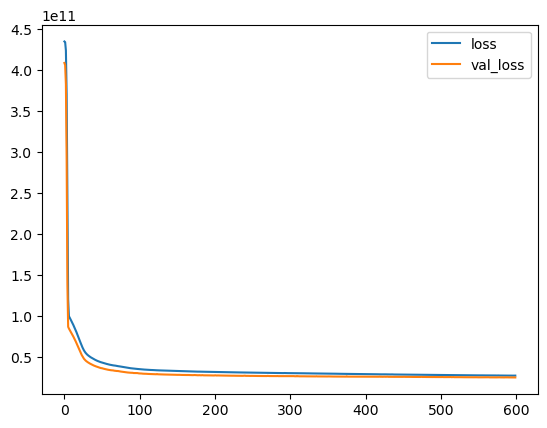

In [210]:
losses.plot()

# Evaluation on test Data 

In [213]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [214]:
X_test


array([[0.64531066, 0.125     , 0.4       , ..., 0.28820598, 0.38564791,
        0.01495162],
       [0.21487018, 0.09375   , 0.23333333, ..., 0.29069767, 0.29444158,
        0.00889217],
       [0.44450957, 0.0625    , 0.26666667, ..., 0.34136213, 0.47169162,
        0.00911272],
       ...,
       [0.12566943, 0.09375   , 0.26666667, ..., 0.2641196 , 0.33574256,
        0.00915063],
       [0.02614411, 0.09375   , 0.23333333, ..., 0.33388704, 0.15677164,
        0.00831322],
       [0.8159804 , 0.09375   , 0.26666667, ..., 0.41611296, 0.32197556,
        0.00752521]])

In [218]:
predictions=model.predict(X_test)
mean_absolute_error(y_test,predictions)
np.sqrt(mean_squared_error(y_test,predictions))
explained_variance_score(y_test,predictions)
df['price'].mean()
df['price'].median()

203/203 [==============================] - 0s 2ms/step


450000.0

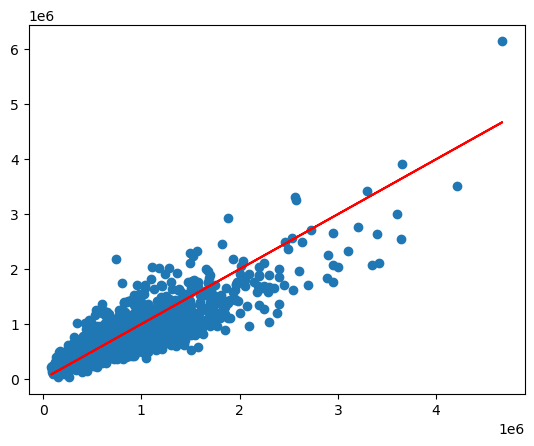

In [219]:
# our Prediction
plt.scatter(y_test,predictions)
#Perfect predictions
plt.plot(y_test,y_test,'r')

In [220]:
errors=y_test.values.reshape(6480,1)-predictions

C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_11304\2392254718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: ylabel='Density'>

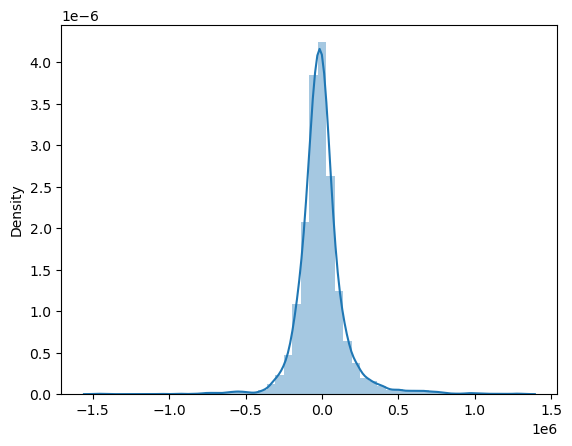

In [221]:
sns.distplot(errors)

# Predicting on brand new house

In [226]:
single_house=df.drop('price', axis=1).iloc[0]
single_house = scaler.transform(single_house.values.reshape(-1, 18))
single_house
model.predict(single_house)
df.iloc[0]

1/1 [==============================] - 0s 25ms/step


C:\Users\SHUBHAM\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


id               7.129301e+09
price            2.219000e+05
bedrooms         3.000000e+00
bathrooms        1.000000e+00
sqft_living      1.180000e+03
sqft_lot         5.650000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.180000e+03
sqft_basement    0.000000e+00
yr_built         1.955000e+03
yr_renovated     0.000000e+00
lat              4.751120e+01
long            -1.222570e+02
sqft_living15    1.340000e+03
sqft_lot15       5.650000e+03
Name: 0, dtype: float64

In [227]:
single_house

array([[0.72010308, 0.0625    , 0.06666667, 0.06150342, 0.00440618,
        0.        , 0.        , 0.        , 0.5       , 0.33333333,
        0.08960177, 0.        , 0.47826087, 0.        , 0.57149751,
        0.21760797, 0.16193426, 0.00573322]])

In [228]:
model.predict(single_house)

1/1 [==============================] - 0s 28ms/step


array([[295279.34]], dtype=float32)

In [229]:
df.iloc[0]

id               7.129301e+09
price            2.219000e+05
bedrooms         3.000000e+00
bathrooms        1.000000e+00
sqft_living      1.180000e+03
sqft_lot         5.650000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.180000e+03
sqft_basement    0.000000e+00
yr_built         1.955000e+03
yr_renovated     0.000000e+00
lat              4.751120e+01
long            -1.222570e+02
sqft_living15    1.340000e+03
sqft_lot15       5.650000e+03
Name: 0, dtype: float64